# Question 1. Approximating the function

a) We approximate the following function $f(x) = \cos(\frac{x}{3})$ with the Taylor Series Expansion:

$$\cos(\frac{x_0 + h}{3}) = \cos(\frac{x_0}{3}) - \frac{h}{3}\sin(\frac{x_0}{3}) - \frac{h^2}{2!\times 9}\cos(\frac{x_0}{3})
\frac{h^3}{3!\times 27}\si

b) Let us express $f(x) = \cos(\frac{x}{3})$ with a power series: $\cos(\frac{x}{3}) = \sum_{k = 0}^{\infty}(-1)^k\frac{(x/3)^{2k}}{2k!}$ with the first four terms:
 $$\hat{f(x)} = 1 - \frac{(x/3)^2}{2!} + \frac{(x/3)^4}{4!} - \frac{(x/3)^6}{6!} $$ 
 Then evaluating at $x = 1$:
 $$\hat{f(1)} =  1 - \frac{(1/3)^2}{2!} + \frac{(1/3)^4}{4!} - \frac{(1/3)^6}{6!}$$
 $$\hat{f(1)} = 0.9449569425 $$
 $$f(1) = \cos(1/3) = 0.9449569463$$
 Thus, we calculate the relative and absolute errors as follows:
 
 $$Absolute: |u - v| = |\cos(1/3) - \hat{f(1)}| = |0.9449569463 - 0.9449569425| = 3.760753\times10^{-9}$$
 $$Relative: \frac{|u - v|}{|u|} = \frac{|\cos(1/3) - \hat{f(1)}|}{|\cos(1/3)|} = \frac{|0.9449569463 - 0.9449569425}{|0.9449569463|} = 3.979814122\times10^{-9}$$
 
 
 c) Let us define the floating-point form as such: $fl(x) = \pm(\frac{d_0}{\beta^0} + \frac{d_1}{\beta^1} + \,...\, +\frac{d_{t - 1}}{\beta^{t - 1}})\beta^{e}$
 $$Absolute = +(\frac{3}{10^0} + \frac{7}{10^1} + \frac{6}{10^2} + \frac{0}{10^3})10^{-9}$$
 $$Relative = +(\frac{3}{10^0} + \frac{9}{10^1} + \frac{7}{10^2} + \frac{9}{10^3})10^{-9}$$
 
 Suppose $\hat{x} = 0.999$ with $x = 1$, then we compute the absolute and relative errors between $f(x)$ and $\hat{f(\hat{x})}$
 $$Absolute = |f(x) - \hat{f(\hat{x})}| = |\cos(1/3) - \hat{f(0.999)}| = |0.9449569463 - 0.94604234| = 1.085393685\times 10^{-3}$$
 $$Relative = \frac{|f(x) - \hat{f(\hat{x})}|}{|f(x)|} = \frac{|0.9449569463 - 0.94604234|}{0.9449569463} = 1.148617077\times 10^{-3}$$
 
 d) Let $\hat{f(x)} = f(x)$ for exact inputs. Thus, we ask what are the absolute and relative errors of slightly inaccurate inputs on the approximate function. 
 
 $$Absolute:= |\hat{f(x)} - \hat{f(\hat{x})}| = |f(x) - \hat{f(\hat{x})}|= |\cos(x/3) + (\frac{h}{3})\sin(x/3) - \cos(x/3))| = |\frac{h}{3}\sin(x/3)|$$
 $$Relative:= \frac{|\hat{f(x)} - \hat{f(\hat{x})}|}{|\hat{f(x)}|} = \frac{|f(x) - \hat{f(\hat{x})}|}{|f(x)|} = \frac{|\frac{h}{3}\sin(x/3)|}{|\cos(x/3)|} = \frac{h}{3}|\tan(x/3)| $$
 
 e) The condition of $f(x)$ is defined through the equation: 
 
 $$\kappa = |\frac{xf'(x)}{f(x)}| = |\frac{-x/3 \sin(x/3)}{\cos(x/3)}| = |x/3 \tan(x/3)|$$

# Question 2. Central Difference

a) We derive the approximation as follows.

We create two equations: 

 $$ (1)\,\,f(x_0 + h) = f(x_0) + hf'(x_0) + \frac{h^2f''(x_0)}{2!} + \,...\, +  $$
 $$(2)\,\, f(x_0 - h) = f(x_0) - hf'(x_0) + \frac{h^2f''(x_0)}{2!} - \frac{h^3f^{(3)}(x_0)}{3!} ...$$
 
 We subtract Equation (2) from Equation (1):
 
 $$f(x_0 + h) - f(x_0 - h) = 2hf'(x_0) + 2\frac{h^3f^{(3)}(x_0)}{3!} + 2\frac{h^5f^{(5)}(x_0)}{5!} ... $$
 
 Thus, 
 
 $$f'(x_0) = \frac{f(x_0 + h) - f(x_0 - h))}{2h} - [\frac{h^2f^{(3)}(x_0)}{3!} + \frac{h^4f^{(5)}(x_0)}{5!} ...]$$
 
 And so the approximate discretization error is calculated as: 
 
 $$|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}| \approx |\frac{h^2f^{(3)}(x_0)}{3!}|$$
 
 

In [9]:
import numpy as np 
x0 = 1.2
f0 = np.sin(x0)
f0_3 = -1*np.cos(x0)
der_f0 = np.cos(x0)
incr = np.linspace(-20, 0, 21)
h = 10**incr
error = np.abs(der_f0 - (np.sin(x0 + h) - np.sin(x0 - h))/(2*h))
approximate_discrete = np.abs(((h**2)*f0_3)/6)


We plot the result of the error below

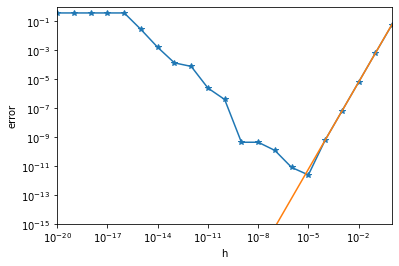

In [10]:
import matplotlib.pyplot as plt
plt.plot(h, error, '-*')
plt.plot(h, approximate_discrete)
plt.axis([1e-20, 1, 1e-15, 1e0])
plt.xlabel('h')
plt.ylabel('error')
plt.yscale('log')
plt.xscale('log')

# Question 3. Polynomial Interpolation

a) We construct the Lagrange polynomial as follows for the data points $\{(x, y)\} = \{(0, 0), (\pi/2, 1), (\pi, 0)\}$. With the given formula:

$$\phi(x)_j = \Pi_{i = 0, i \neq j}^{n}\frac{(x - x_i)}{(x_j - x_i)}$$
Thus, 
$$\phi(x)_0 = \frac{2}{\pi^2}(x - \pi/2)(x - \pi)$$
$$\phi(x)_1 = -\frac{4}{\pi^2}(x)(x - \pi)$$
$$\phi(x)_1 = \frac{2}{\pi^2}(x)(x - \pi/2)$$

So we construct the polynomial as follows: 
$$p(x) = \sum_{i = 0}^{n}y_i\phi(x)_i$$
$$p(x) = \phi(x)_1$$
$$p(x) = \frac{4}{\pi}x - \frac{4}{\pi^2}x^2$$

In [4]:
import numpy as np 
import math
x = np.linspace(0, math.pi, 1000) #inteval from [0, pi]
y_sin = np.sin(x)**2
y_pol = (4/math.pi)*x - (4/(math.pi**2))*(x**2)

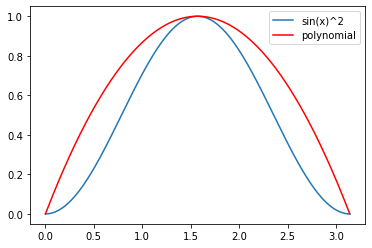

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y_sin)
plt.plot(x, y_pol, 'r')
plt.legend(["sin(x)^2", "polynomial"])

We may make this approximation more accurate by increasing the amount of data points for the construction of the polynomial. 

In [2]:
import numpy as np 
import math
x_1 = np.linspace(-math.pi, math.pi, 100) #inteval from [0, pi]
y_sin_1 = np.sin(x_1)**2
y_pol_1 = (4/math.pi)*(x_1) - (4/(math.pi**2))*(x_1**2)

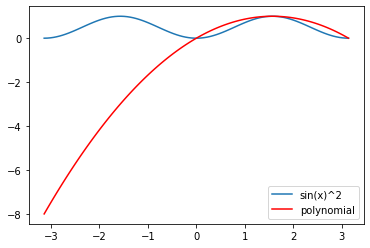

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_1, y_sin_1)
plt.plot(x_1, y_pol_1, 'r')
plt.legend(["sin(x)^2", "polynomial"])

# Question 4. 

a) To allow for a simpler construction, we use Lagrange basis functions. We allow $v(x) = u(x)^2$, such that the data points $\{(x_i, y_i)\}^{n} = \{(x_0, y_0), (x_1, y_1), (x_2, y_2)\}$ are defined for $y_i = u(x_i)$. Let $u(x) = (\gamma_0 + \gamma_1 x + \gamma_2 x^2)^{1/2}$. We construct the interpolant as follows: 

$$p(x) = \sum_{j = 0}^{n}\phi_j(x)y_j$$
$$\phi_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}$$
$$\phi_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}$$
$$\phi_2(x) = \frac{(x - x_1)(x - x_0)}{(x_2 - x_1)(x_2 - x_0)}$$

Creating the interpolant for $v(x)$:

$$p(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}(\gamma_0 + \gamma_1 x_0 + \gamma_2 x_0^2) + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}(\gamma_0 + \gamma_1 x_1 + \gamma_2 x_1^2) + \frac{(x - x_1)(x - x_0)}{(x_2 - x_1)(x_2 - x_0)}(\gamma_0 + \gamma_1 x_2 + \gamma_2 x_2^2) $$

Writing $u(x)$ in terms of the original data pairs: 

$$p(x)' = (\frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}(\gamma_0 + \gamma_1 x_0 + \gamma_2 x_0^2) + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}(\gamma_0 + \gamma_1 x_1 + \gamma_2 x_1^2) + \frac{(x - x_1)(x - x_0)}{(x_2 - x_1)(x_2 - x_0)}(\gamma_0 + \gamma_1 x_2 + \gamma_2 x_2^2))^{1/2} $$

b) Given the way we constructed the interpolant, we can create three equations to solve for the $\gamma_i$ constants. Since, the Lagrange values either vanish or equal zero for $u(x_i) = y_i$ we have three equations:

$$(1)\,\, \gamma_0 + \gamma_1 x_0 + \gamma_1 x_0^2 = y_0^2$$
$$(2)\,\, \gamma_0 + \gamma_1 x_1 + \gamma_1 x_1^2 = y_1^2$$
$$(3)\,\, \gamma_0 + \gamma_1 x_2 + \gamma_1 x_2^2 = y_2^2$$

$$(1)\,\, \gamma_0 + \gamma_1 0.1 + \gamma_1 (0.1)^2 = (0.5)^2$$
$$(2)\,\, \gamma_0 + \gamma_1 1 + \gamma_1 1^2 = 1^2$$
$$(3)\,\, \gamma_0 + \gamma_1 2 + \gamma_1 2^2 = 4^2$$

In [19]:
import numpy as np 

A = np.array([[1, 0.1, 0.01], [1, 1, 1], [1, 2, 4]])
y = np.array([0.25, 1, 16])
gamma_i = np.linalg.solve(A, y)
gamma_i

array([ 0.9122807 , -7.36842105,  7.45614035])

/tmp/ipykernel_142/2485583119.py:3: RuntimeWarning: invalid value encountered in sqrt
  u = np.sqrt(gamma_i[0] + gamma_i[1]*x + gamma_i[2]*(np.power(x, 2)))


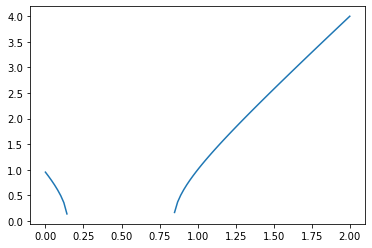

In [20]:
import matplotlib.pyplot as plt
x = np.linspace(0, 2, 100)
u = np.sqrt(gamma_i[0] + gamma_i[1]*x + gamma_i[2]*(np.power(x, 2)))
plt.plot(x, u)